<a href="https://colab.research.google.com/github/Slippers3310/penguins/blob/main/%C4%B0layda_UCAN_210105016_Hw2_ipynb_adl%C4%B1_not_defterinin_kopyas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yeni Bölüm

In [235]:
# LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Splitting dataset
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


import seaborn as sns
sns.set_style("whitegrid")


RANDOM_STATE = 55


# 1- INTRODUCTION

This dataset uploaded from my desktop which is penguin size file

In [236]:
import seaborn as sns
import pandas as pd

penguins = sns.load_dataset("penguins")
penguins.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# 2- Exploratory Data Analysis, Data Visualization, Data Preparation and Feature Engineering

This cell's aim is data preparation. We are going to get to know the data and find the missing values

In [237]:
penguins.shape


(344, 7)

In [238]:
penguins.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [239]:
penguins.head()



,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [240]:
penguins.isnull().sum()

,0
species,0
island,0
bill_length_mm,2
bill_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,11


In [241]:
# Filling in missing data
penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].median(), inplace=True)
penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].median(), inplace=True)
penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].median(), inplace=True)
penguins['body_mass_g'].fillna(penguins['body_mass_g'].median(), inplace=True)
penguins['sex'].fillna(penguins['sex'].mode()[0], inplace=True)


<ipython-input-241-d0c6557a0d24>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].median(), inplace=True)
<ipython-input-241-d0c6557a0d24>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].

### penguins.shape => to find out how many rows and columns the data consists of

### penguins.info() => see all the column names and types in the dataset
### penguins.head() => to see the first 5 rows

### penguins.isnull().sum() => to check if there are missing values ​​in the dataset

### 2.1 Scatterplot, Boxplots and Pairplots

Scatter Plot

A scatter plot is a graph that visualizes the relationship between two continuous variables in data. This  graph,  examine the linear or non-linear relationship between two variables. Each point represents a sample (row) in the data.

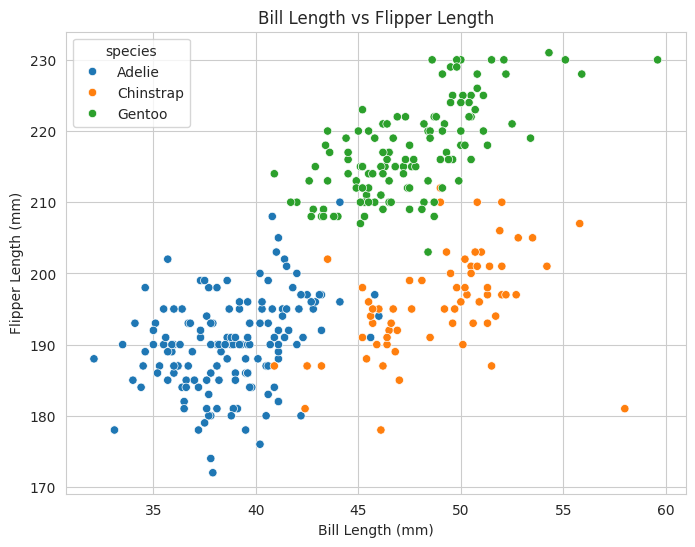

In [242]:
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
penguins = sns.load_dataset("penguins")

# Scatter plot: relation between bill_length_mm and flipper_length_mm
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bill_length_mm', y='flipper_length_mm', hue='species', data=penguins)
plt.title('Bill Length vs Flipper Length')
plt.xlabel('Bill Length (mm)')
plt.ylabel('Flipper Length (mm)')
plt.show()


Boxplot

A box plot is a graph that visualizes a summary of numerical data. It shows the central tendency, spread, quartiles, and outliers of the data. For each type, the box plot shows the min, 25th percentile, median (50th percentile), 75th percentile, and maximum values. The points outside the box are outliers.

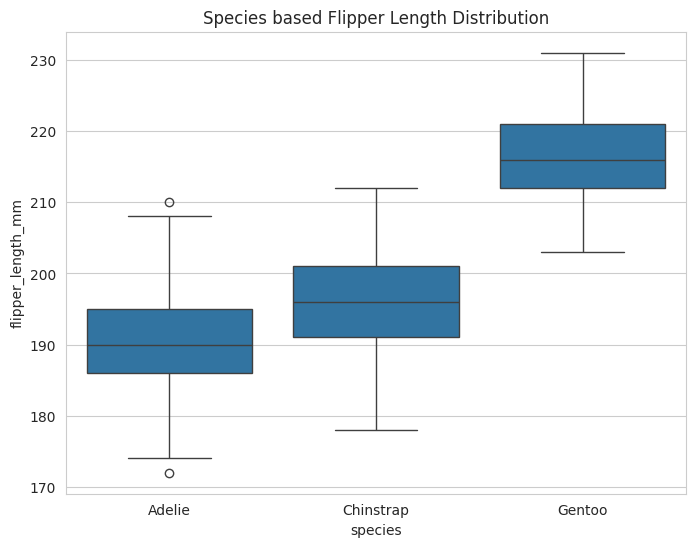

In [243]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='flipper_length_mm', data=penguins)
plt.title('Species based Flipper Length Distribution')
plt.show()

Pairplot

A pairplot shows the relationship between multiple variables with multiple scatterplots. This visualization is very useful for exploring the pairwise relationships between numerical variables. It also shows the distribution of each feature of the data.For example, let's visualize the relationships between all numerical features and separate them with different colors based on species:

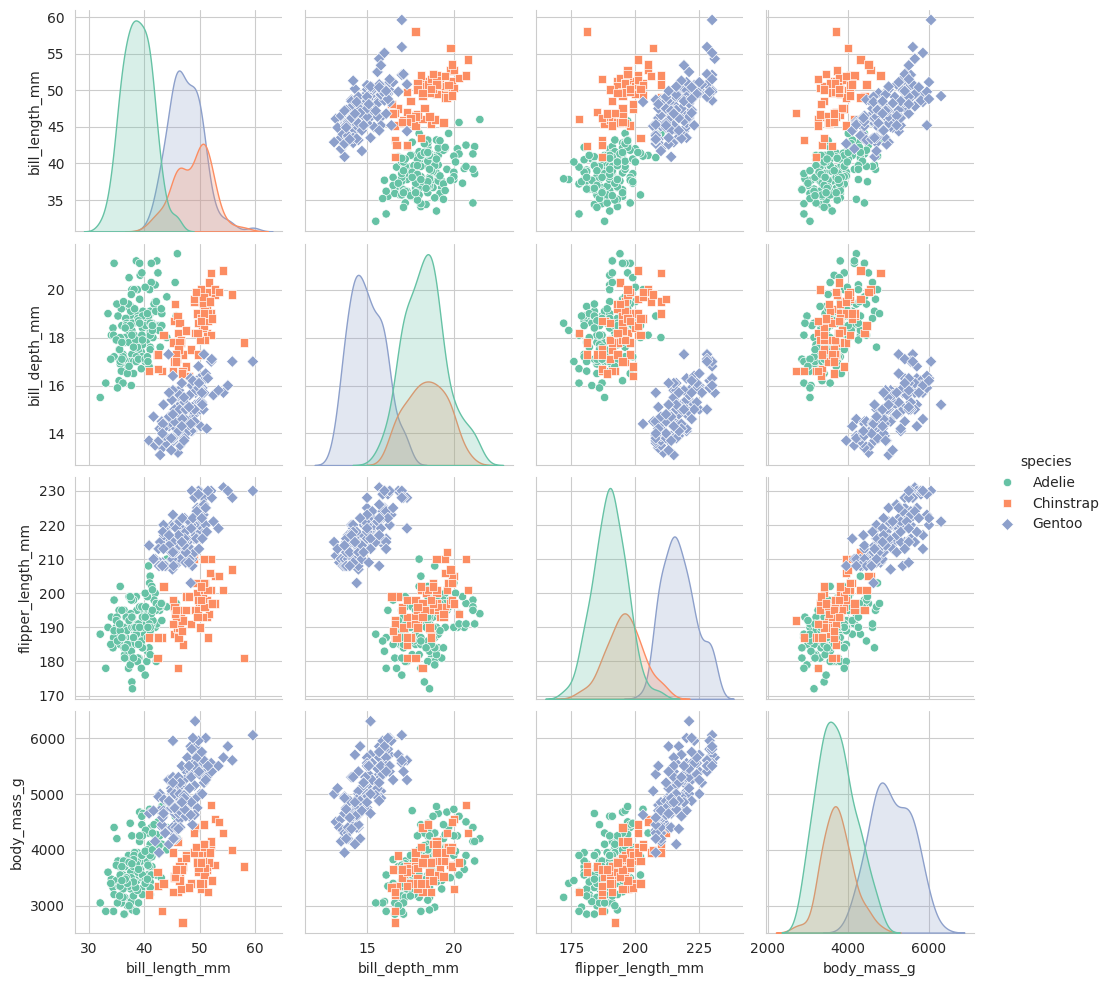

In [244]:

sns.pairplot(penguins, hue='species', markers=["o", "s", "D"], palette='Set2')
plt.show()


### 2.2 - missing or null values and for any anomalies

In [245]:

print(penguins.isnull().sum())


species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


To handle with null values we can fill by Mean, Mode and Median.

In [246]:
penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].median(), inplace=True)


<ipython-input-246-02a6aaa96efe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].median(), inplace=True)


In [247]:
penguins['species'].fillna(penguins['species'].mode()[0], inplace=True)


<ipython-input-247-196bd51ba580>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  penguins['species'].fillna(penguins['species'].mode()[0], inplace=True)


In [248]:
species_encoder = LabelEncoder()
penguins['species_encoded'] = species_encoder.fit_transform(penguins['species'])

# for island and sex
island_encoder = LabelEncoder()
penguins['island_encoded'] = island_encoder.fit_transform(penguins['island'])

sex_encoder = LabelEncoder()
penguins['sex_encoded'] = sex_encoder.fit_transform(penguins['sex'])


penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,species_encoded,island_encoded,sex_encoded
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,Male,0,2,1
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,Female,0,2,0
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,Female,0,2,0
3,Adelie,Torgersen,44.45,NaN,NaN,NaN,NaN,0,2,2
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,Female,0,2,0


### 2.3 Encoding using Pandas

One Hot Encoding (OHE) is a common method of converting categorical data into numeric data. In this process, a new column is created for each category and in the rows corresponding to each category, one of these columns is marked as 1 (true) while the others are 0 (false).

In [249]:
# Digitize categorical data
penguins_encoded = pd.get_dummies(penguins, drop_first=True) # Drop first to avoid multicollinearity

# Check the first few rows of new data
print(penguins_encoded.head())
from sklearn.preprocessing import LabelEncoder

# Digitize categorical data using LabelEncoder
le = LabelEncoder()

# Encode all categorical columns
penguins_encoded = penguins.copy()
categorical_columns = penguins_encoded.select_dtypes(include=['object']).columns

# Label Encoding operation
for col in categorical_columns:penguins_encoded[col] = le.fit_transform(penguins_encoded[col])

# Check the new data
print(penguins_encoded.head())


   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0           39.10           18.7              181.0       3750.0   
1           39.50           17.4              186.0       3800.0   
2           40.30           18.0              195.0       3250.0   
3           44.45            NaN                NaN          NaN   
4           36.70           19.3              193.0       3450.0   

   species_encoded  island_encoded  sex_encoded  species_Chinstrap  \
0                0               2            1              False   
1                0               2            0              False   
2                0               2            0              False   
3                0               2            2              False   
4                0               2            0              False   

   species_Gentoo  island_Dream  island_Torgersen  sex_Male  
0           False         False              True      True  
1           False         False              T

Why we used Pandas here is

Pandas makes it very easy to organize, filter and transform data with its DataFrame structure.

Pandas provides a very useful function, get_dummies(), to transform categorical data with One Hot Encoding.

Pandas allows you to group, filter, transform and analyze data very quickly and flexibly.

Splitting Dataset

Training Set (X_train, y_train): Used for model learning.

Test Set (X_test, y_test): Used to evaluate the model's performance after learning.

# 3- Building the Models


### 3.1 Decision Tree

We will compare the model’s accuracies on training and test sets using DecisionTreeClassifier. We will do this comparison using different hyperparameters (for example: max_depth, criterion, max_leaf_nodes, min_samples_split, min_samples_leaf).

In [250]:
# Specify features (X) and target (y)
X = penguins_encoded.drop(columns='species') # species target variable
y = penguins_encoded['species']

# Separation into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up the model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=10, random_state=42)
model.fit(X_train, y_train)

# Accuracy on test set
y_pred = model.predict(X_test)


In [251]:
# Let's try to convert the data to numeric
print(X_train.dtypes) # Check the data types
print(X_train.head()) # Let's review the first few lines by printing

# If there are still strings, you should convert them to numeric values

island                 int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
species_encoded        int64
island_encoded         int64
sex_encoded            int64
dtype: object
     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
66        0            35.5           16.2              195.0       3350.0   
229       0            46.8           15.4              215.0       5150.0   
7         2            39.2           19.6              195.0       4675.0   
140       1            40.2           17.1              193.0       3400.0   
323       0            49.1           15.0              228.0       5500.0   

     sex  species_encoded  island_encoded  sex_encoded  
66     0                0               0            0  
229    1                2               0            1  
7      1                0               2            1  
140    0                0   

This graph will show how the training and testing accuracies of the model change with different values ​​of `max_depth`.

### 3.2 Finding the Best Parameters Using GridSearchCV

GridSearchCV helps us find the best parameters by trying different combinations of hyperparameters.


We will use GridSearchCV with parameters like max_depth, min_samples_split, and criterion.

In [252]:
from sklearn.model_selection import GridSearchCV

# Decision Tree Parameter Grid
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=RANDOM_STATE)

# GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters found: ", grid_search.best_params_)

# Best model
best_dt_model = grid_search.best_estimator_


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters found:  {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}


3.3 Final Decision Tree Model and Evaluations

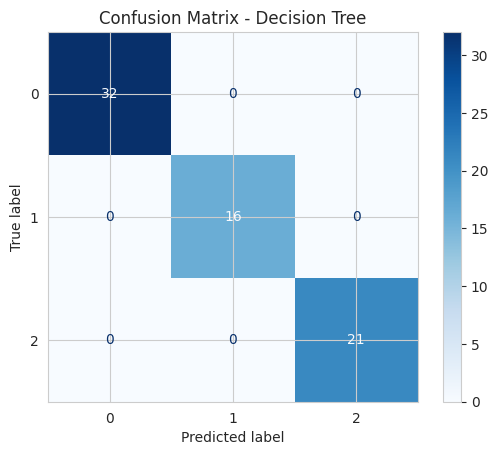

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [253]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

# Confusion Matrix for Decision Tree Model
y_pred = best_dt_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Decision Tree")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


3.4 Installation and Performance Evaluation of Random Forest Model

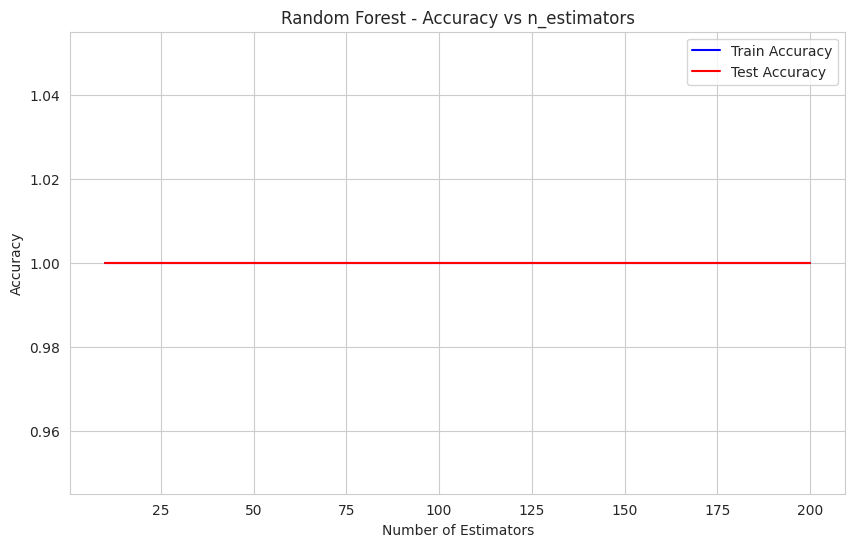

In [254]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Hyperparameter Tuning for n_estimators
n_estimators_range = range(10, 201, 10)
train_accuracy_rf = []
test_accuracy_rf = []

for n in n_estimators_range:
    rf_model = RandomForestClassifier(n_estimators=n, random_state=RANDOM_STATE)
    rf_model.fit(X_train, y_train)

    # Predict on train and test
    y_train_pred_rf = rf_model.predict(X_train)
    y_test_pred_rf = rf_model.predict(X_test)

    # Append accuracy
    train_accuracy_rf.append(accuracy_score(y_train, y_train_pred_rf))
    test_accuracy_rf.append(accuracy_score(y_test, y_test_pred_rf))

# Plot the accuracy of train and test sets for different n_estimators values
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracy_rf, label="Train Accuracy", color="blue")
plt.plot(n_estimators_range, test_accuracy_rf, label="Test Accuracy", color="red")
plt.title('Random Forest - Accuracy vs n_estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


3.4 5. Random Forest Final Model and Evaluations

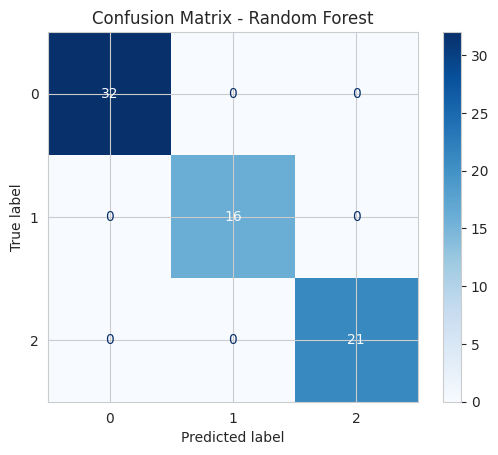

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69



In [255]:
# Final Random Forest Model with best n_estimators
best_rf_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
best_rf_model.fit(X_train, y_train)

# Confusion Matrix for Random Forest Model
y_pred_rf = best_rf_model.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=best_rf_model.classes_)
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# Classification Report for Random Forest Model
print("Classification Report - Random Forest:")
print(classification_report(y_test, y_pred_rf))